<a href="https://colab.research.google.com/github/Himagination/time_series/blob/main/Time_Series_Anlaysis_ARIMA_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOCK PRICES

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2022-05-15 09:13:45--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  2.13MB/s    in 27s     

2022-05-15 09:14:13 (916 KB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [2]:
!pip install --quiet pmdarima
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 36.6 MB/s 


In [3]:
df = pd.read_csv("sp500sub.csv", 
                 index_col="Date", 
                 parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


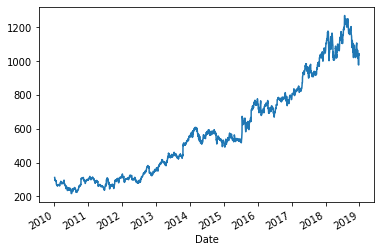

In [4]:
goog = df[df["Name"] == "GOOG"]["Close"]
goog.plot();

In [5]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [6]:
model = pm.auto_arima(train, 
                      error_action="ignore", 
                      trace=True, 
                      suppress_warnings=True, 
                      seasonal=False)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16241.528, Time=4.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16268.065, Time=1.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.873, Time=2.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16241.129, Time=9.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=1.27 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16243.473, Time=10.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16244.850, Time=9.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16241.203, Time=8.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16255.943, Time=5.20 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16242.123, Time=10.56 sec
 ARIMA(3,1,2)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -8113.565
Date:                Sun, 15 May 2022   AIC                          16241.129
Time:                        09:15:43   BIC                          16281.104
Sample:                             0   HQIC                         16255.726
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8168      0.517      1.580      0.114      -0.196       1.830
ar.L1         -0.6632      0.027    -24.776      0.000      -0.716      -0.611
ar.L2         -0.9249      0.019    -47.723      0.000      -0.963      -0.887
ar.L3          0.0402      0.015      2.684      0.007       0.011       0.070
ma.L1          0.7059      0.022     31.863      0.000       0.663       0.749
ma.L2          0.9175      0.021     44.347      0.000       0.877       0.958
sigma2        84.2227      1.051     80.166      0.000      82.164      86.282
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11418.46
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               6.60   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [8]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params["order"][1]
  train_pred = model.predict_in_sample(start=d, end=-1)
  test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(fulldata.index, fulldata, label="data")
  ax.plot(train.index[d:], train_pred, label="fitted")
  ax.plot(test.index, test_pred, label="forecast")
  ax.fill_between(test.index, \
                  confint[:,0], confint[:,1], \
                  color="red", alpha=0.3)
  ax.legend();

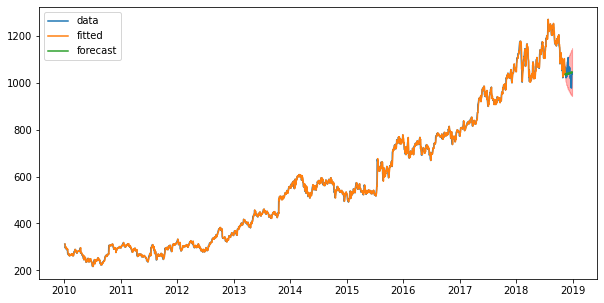

In [9]:
plot_result(model, goog, train, test)

In [10]:
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods=Ntest, 
                                     return_conf_int=True)
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(test.index, test, label="true")
  ax.plot(test.index, test_pred, label="forecast")
  ax.fill_between(test.index, \
                  confint[:, 0], confint[:, 1], \
                  color="red", alpha=0.3)
  ax.legend();

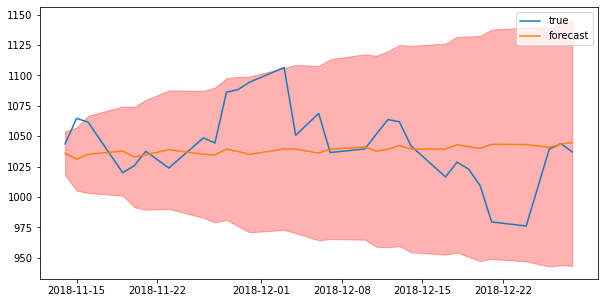

In [11]:
plot_test(model, test)

In [12]:
def rmse(y, t):
  return np.sqrt(np.mean((t-y) ** 2))

In [13]:
print(f"RMSE ARIMA: {rmse(model.predict(Ntest), test)}")
print(f"RMSE Naive: {rmse(train.iloc[-1], test)}")

RMSE ARIMA: 30.846583487216236
RMSE Naive: 30.029502477261467


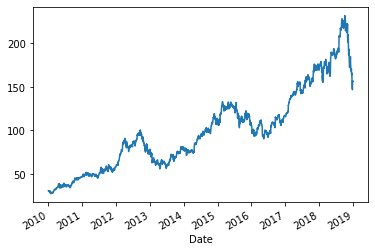

In [14]:
aapl = df[df["Name"] == "AAPL"]["Close"]
aapl.plot();

In [15]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [16]:
model = pm.auto_arima(train, 
                      error_action="ignore", 
                      trace=True, 
                      suppress_warnings=True, 
                      maxiter=10, 
                      seasonal=False)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=1.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=1.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=1.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=1.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=1.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=1.93 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.87 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Sun, 15 May 2022   AIC                           8570.296
Time:                        09:15:58   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

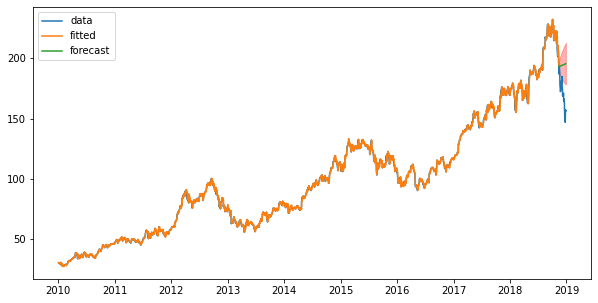

In [17]:
plot_result(model, aapl, train, test)

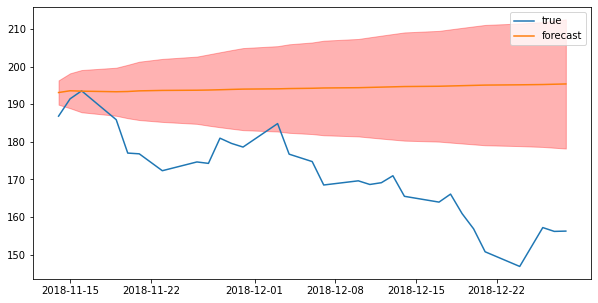

In [18]:
plot_test(model, test)

In [19]:
print(f"RMSE ARIMA: {rmse(model.predict(Ntest), test)}")
print(f"RMSE Naive: {rmse(train.iloc[-1], test)}")

RMSE ARIMA: 26.094965173409967
RMSE Naive: 24.027120586673817


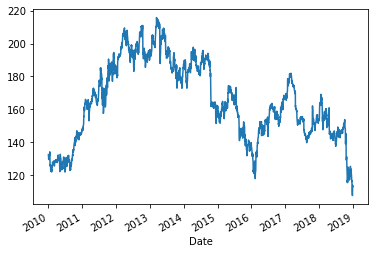

In [20]:
ibm = df[df["Name"] == "IBM"]["Close"]
ibm.plot();

In [21]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [22]:
model = pm.auto_arima(train, 
                      error_action="ignore", 
                      trace=True, 
                      suppress_warnings=True, 
                      maxiter=10, 
                      seasonal=False)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.93 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.117 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Sun, 15 May 2022   AIC                           9434.097
Time:                        09:16:02   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

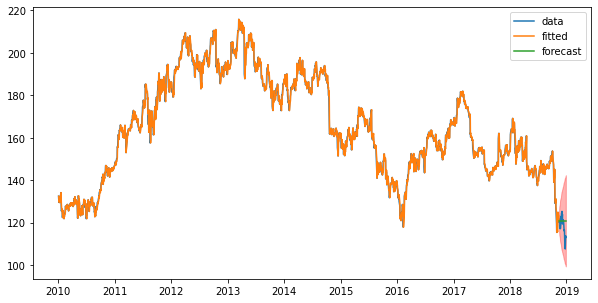

In [23]:
plot_result(model, ibm, train, test)

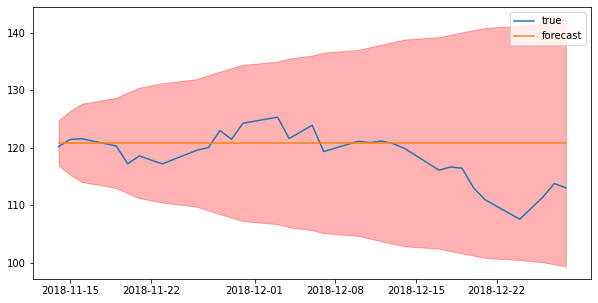

In [24]:
plot_test(model, test)

In [25]:
print(f"RMSE ARIMA: {rmse(model.predict(Ntest), test)}")
print(f"RMSE Naive: {rmse(train.iloc[-1], test)}")

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


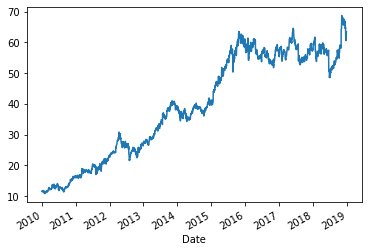

In [26]:
sbux = df[df["Name"] == "SBUX"]["Close"]
sbux.plot();

In [27]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [28]:
model = pm.auto_arima(train, 
                      error_action="ignore", 
                      trace=True, 
                      suppress_warnings=True, 
                      maxiter=10, 
                      seasonal=False)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.63 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.498 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Sun, 15 May 2022   AIC                           3851.895
Time:                        09:16:07   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

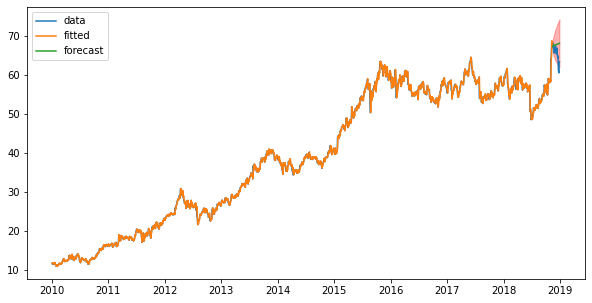

In [29]:
plot_result(model, sbux, train, test)

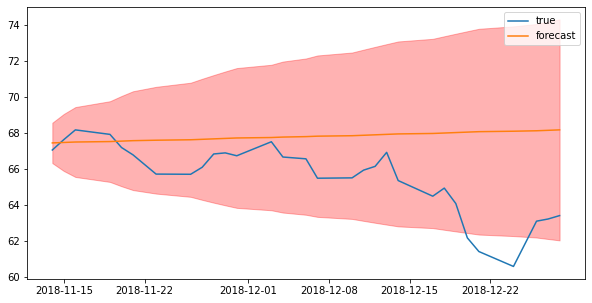

In [30]:
plot_test(model, test)

In [31]:
print(f"RMSE ARIMA: {rmse(model.predict(Ntest), test)}")
print(f"RMSE Naive: {rmse(train.iloc[-1], test)}")

RMSE ARIMA: 3.094903479339405
RMSE Naive: 2.6889385763409135


## Without Auto ARIMA method.

In [32]:
df = pd.read_csv("sp500sub.csv", 
                 index_col="Date", 
                 parse_dates=True)

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf 

In [34]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()

In [35]:
goog = df[df["Name"] == "GOOG"][["Close"]].copy()

In [36]:
goog["LogRet"] = log_ret(goog["Close"])
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


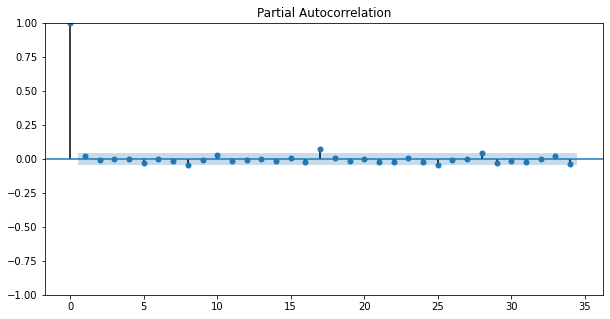

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(goog["LogRet"].dropna(), ax=ax);

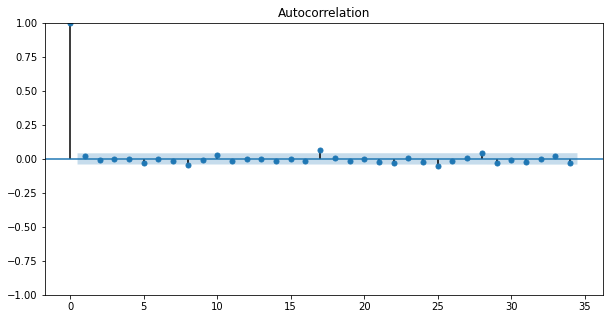

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(goog["LogRet"].dropna(), ax=ax);

In [39]:
aapl = df[df["Name"] == "AAPL"][["Close"]].copy()

In [40]:
aapl["LogRet"] = log_ret(aapl["Close"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


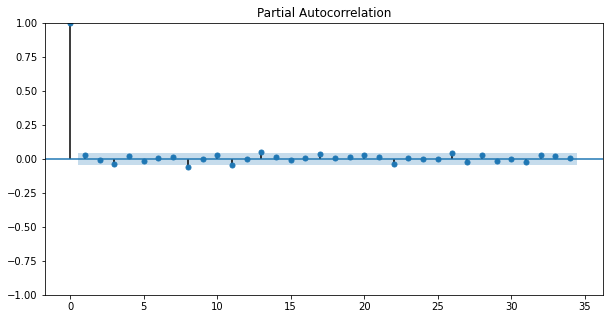

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(aapl["LogRet"].dropna(), ax=ax);

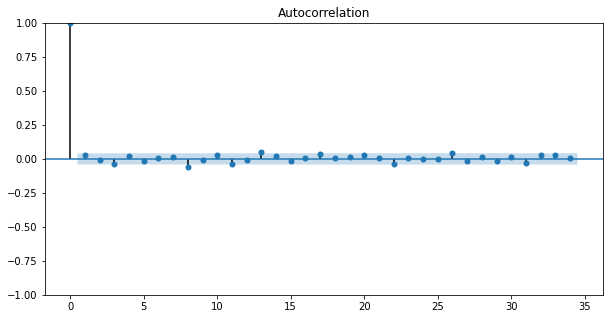

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(aapl["LogRet"].dropna(), ax=ax);

In [43]:
ibm = df[df["Name"] == "IBM"][["Close"]].copy()
ibm["LogRet"] = log_ret(ibm["Close"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


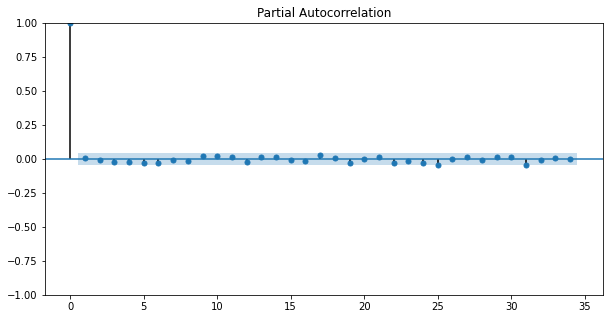

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ibm["LogRet"].dropna(), ax=ax);

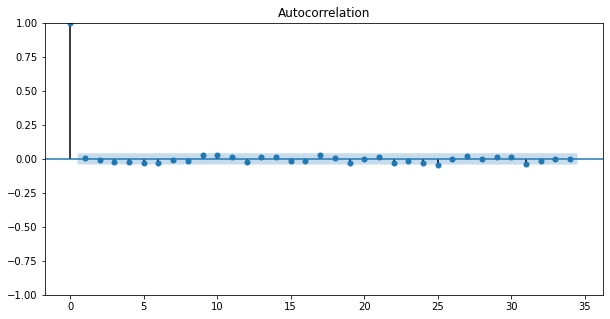

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ibm["LogRet"].dropna(), ax=ax);

# SALES DATA

In [46]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2022-05-15 09:16:12--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-05-15 09:16:12 (22.4 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [47]:
df = pd.read_csv("perrin-freres-monthly-champagne.csv", 
                 index_col="Month", 
                 skipfooter=2, 
                 parse_dates=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [48]:
df.columns = ["Sales"]

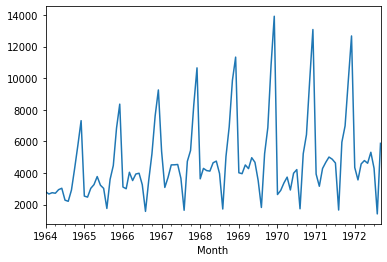

In [49]:
df["Sales"].plot();

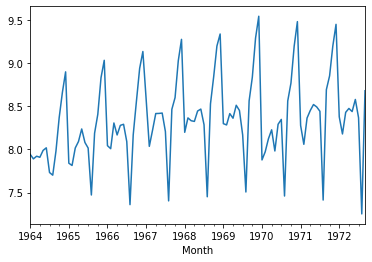

In [50]:
df["LogSales"] = np.log(df["Sales"])
df["LogSales"].plot();

In [51]:
df.index.freq = "MS"

In [52]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [53]:
# Boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [54]:
model = pm.auto_arima(train["LogSales"], 
                      trace=True, 
                      suppress_warnings=True, 
                      seasonal=True, 
                      m=12)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.473, Time=4.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=3.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=1.76 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.98 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=1.93 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=6.98 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=1.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=1.50 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  33.917
Date:                            Sun, 15 May 2022   AIC                            -57.834
Time:                                    09:17:19   BIC                            -45.862
Sample:                                         0   HQIC                           -53.031
                                             - 93                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.011      0.773      0.439      -0.013       0.029
ar.L1          0.8621      0.160      5.389      0.000       0.549       1.176
ma.L1         -0.6697      0.220     -3.047      0.002      -1.100      -0.239
ma.S.L12      -0.4796      0.116     -4.119      0.000      -0.708      -0.251
sigma2         0.0244      0.003      8.574      0.000       0.019       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.68
Prob(H) (two-sided):                  0.51   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

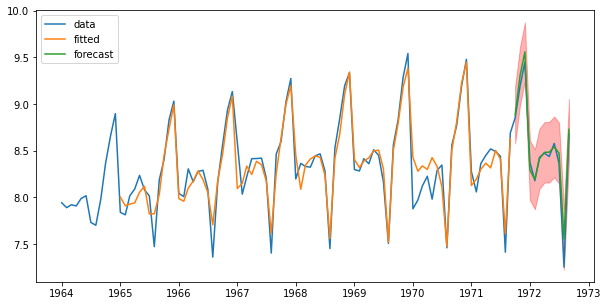

In [55]:
# Since the model is seasonal, plotting or predicting the first 12
# values doesn't make sense.
train_pred = model.predict_in_sample(start=12, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["LogSales"], label="data")
ax.plot(train.index[12:], train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color="red", alpha=0.3)
ax.legend();

In [56]:
# Compute R-squared
from sklearn.metrics import r2_score
r2_score(test["Sales"], np.exp(test_pred))

0.9546975064188559

In [57]:
from statsmodels.tsa.arima.model import ARIMA

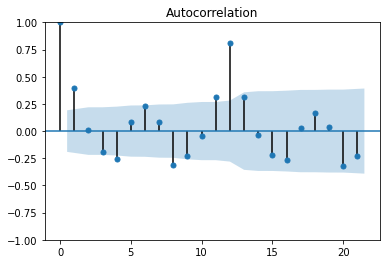

In [58]:
plot_acf(df["LogSales"]);

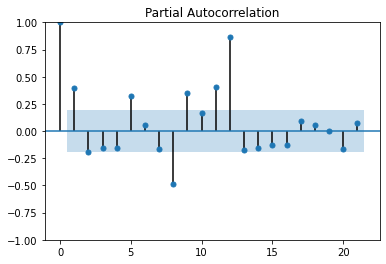

In [59]:
plot_pacf(df["LogSales"], method="ols");

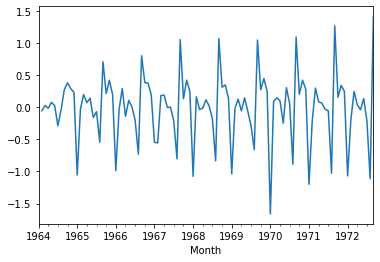

In [60]:
df["LogSales"].diff().plot();

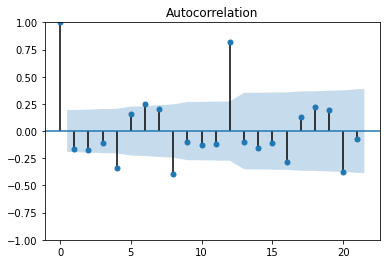

In [61]:
plot_acf(df["LogSales"].diff().dropna());

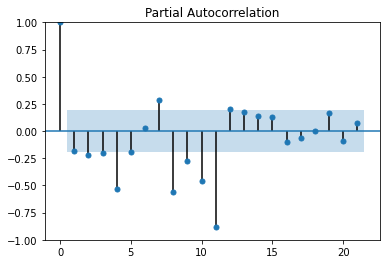

In [62]:
plot_pacf(df["LogSales"].diff().dropna(), method="ols");

In [63]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["LogSales"])

(-2.2551186012844227,
 0.1868517311168746,
 13,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 -49.19143751582993)

In [64]:
adfuller(df["LogSales"].diff().dropna())

(-4.460914465253656,
 0.00023121404649533762,
 12,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 -43.63799632128641)

In [66]:
def plot_fit_and_forecast(result, d=0, col="Sales"):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df[col], label="data")
  train_pred = result.fittedvalues
  ax.plot(train.index[d:], 
          train_pred[d:], 
          color="green", 
          label="fitted")
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f"lower {col}"], conf_int[f"upper {col}"]
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label="forecast")
  ax.fill_between(test.index, 
                  lower, 
                  upper, 
                  color="red", 
                  alpha=0.3)
  ax.legend()
  return forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


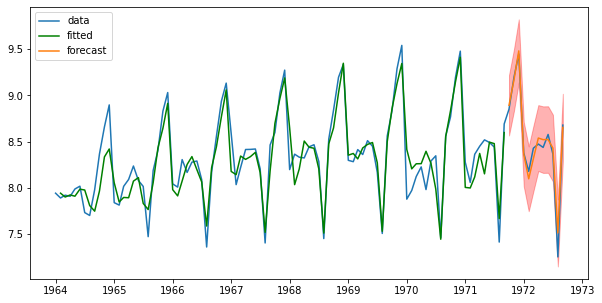

In [67]:
arima = ARIMA(train["LogSales"], order=(12, 1, 2))
arima_result = arima.fit()
forecast = plot_fit_and_forecast(arima_result, 
                                 d=1, 
                                 col="LogSales")

In [68]:
r2_score(test["Sales"], np.exp(forecast))

0.9865592328774733